In [2]:
import pandas as pd

In [3]:
marketing_data =pd.read_csv('./data/marketing_campaign.csv', delimiter='\t')

In [4]:
marketing_data = marketing_data[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [5]:
marketing_data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
NumStorePurchases,4,2,10,4,6


In [17]:
marketing_data.groupby('Kidhome')['NumStorePurchases'].mean()

Kidhome
0    7.217324
1    3.863181
2    3.437500
Name: NumStorePurchases, dtype: float64

In [6]:
marketing_data.dtypes

ID                     int64
Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Kidhome                int64
Teenhome               int64
Dt_Customer           object
Recency                int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [33]:
left = pd.DataFrame({'id': [1, 2, 3, 4], 'age':[10, 20, 30, 40]})
right = pd.DataFrame({'id': [1, 2, 3, 4, 5], 'age':[100, 120, 130, 140, 150]})

In [34]:
right

,id,age
0,1,100
1,2,120
2,3,130
3,4,140
4,5,150


In [36]:
pd.merge(left, right, on='id', how='left')

,id,age_x,age_y
0,1,10,100
1,2,20,120
2,3,30,130
3,4,40,140


In [39]:
marketing_data.sort_values(['Kidhome', 'Teenhome', 'Recency'], ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,4,6
178,10492,1959,Graduation,Together,38285.0,2,1,24-06-2014,96,3,2
148,5885,1973,2n Cycle,Married,35688.0,2,1,22-08-2012,94,4,8
383,3310,1973,2n Cycle,Married,35688.0,2,1,22-08-2012,94,4,8
616,8953,1965,Master,Single,35791.0,2,1,06-05-2013,94,3,8
...,...,...,...,...,...,...,...,...,...,...,...
810,2964,1981,Graduation,Married,26872.0,0,0,16-10-2013,0,2,6
822,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,7,5
1089,7348,1958,PhD,Single,71691.0,0,0,17-03-2014,0,5,2
1537,10530,1959,PhD,Widow,67786.0,0,0,07-12-2013,0,6,1


In [40]:
marketing_data['bins'] = pd.cut(x=marketing_data['NumStorePurchases'], bins=[0, 4, 8, 13], labels=['Low', 'Moderate', 'High'])

In [41]:
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumStorePurchases,NumWebVisitsMonth,bins
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,4,7,Low
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2,5,Low
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,10,4,High
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,4,6,Low
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,6,5,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,4,5,Low
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,5,7,Moderate
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,13,6,High
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,10,3,High


<Axes: >

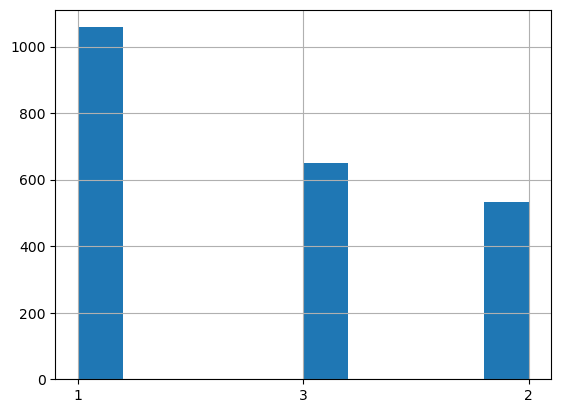

In [55]:
pd.qcut(x=marketing_data['NumStorePurchases'], q=3, labels=['1', '2', '3']).hist()

# Removing Duplicated Data

- With keep parameter, we can specify whether we want to keep the "first" or "last" instance of drop all instances of the duplicated information (default method keeps the first instance)

In [27]:
import pandas as pd

marketing_data = pd.read_csv('./data/marketing_campaign.csv', delimiter='\t')

marketing_data = marketing_data[['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Income']]

# marketing_data_duplicated = marketing_data.drop_duplicates()

In [20]:
marketing_data_duplicated

,Education,Marital_Status,Kidhome,Teenhome
0,Graduation,Single,0,0
1,Graduation,Single,1,1
2,Graduation,Together,0,0
3,Graduation,Together,1,0
4,PhD,Married,1,0
...,...,...,...,...
2134,Master,Absurd,0,0
2147,Master,Together,1,2
2177,PhD,YOLO,0,1
2208,Basic,Together,0,1


# Dropping data rows and columns

Axis 0 is used for rows and 1 is for columns 

# Replacing data

- Replacing values in rows or columns
- First argument of the method is a list of existing values that we want to replace
- Second argument contains a list of the values we want to replace with
- The two lists must be same length 


In [21]:
marketing_data['Teenhome_replaced'] = marketing_data['Teenhome'].replace([0,1,2], ['hast no teem', 'has teen', 'has teen'])

In [22]:
marketing_data['Teenhome_replaced']

0       hast no teem
1           has teen
2       hast no teem
3       hast no teem
4       hast no teem
            ...     
2235        has teen
2236        has teen
2237    hast no teem
2238        has teen
2239        has teen
Name: Teenhome_replaced, Length: 2240, dtype: object

In [28]:
marketing_data.isnull().sum()

Education          0
Marital_Status     0
Kidhome            0
Teenhome           0
Income            24
dtype: int64